# Multiple regression using Advertising dataset - student version


Dataset: advertising.csv

## Multiple Linear Regression

Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship.

Equation

$$y=\beta_0+\beta_1*x_1+\beta_2*x_2+..+\beta_n*x_n+e$$

where
- $y$ = Dependent variable / Target variable
- $\beta_0$ = Intercept of the regression line
- $\beta_0, \beta_1, .. \beta_n$ = Slope of the regression line which tells whether the line is increasing or decreasing
- $ x_1, x_2, .. x_n$ = Independent variable / Predictor variable
- e = Error 


Predicting sales based on the money spent on TV, Radio, and Newspaper for marketing. In this case, there are three independent variables, i.e., money spent on TV, Radio, and Newspaper for marketing, and one dependent variable, i.e., sales, that is the value to be predicted.

In [247]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
# Reading the dataset
# TODO: read the dataset (ds) and find out the properties
ds = pd.read_csv("advertising.csv")
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [249]:
# Setting the value for X (=features) and y (=sales)
# TODO: select the features (X) and target (y)
X = ds[["TV", "Radio", "Newspaper"]]
y = ds[["Sales"]]
X.shape, y.shape

((200, 3), (200, 1))

In [250]:
# Splitting the dataset
# random_sate controls shuffling applied to the data before applying the split. 
# (pass an int for reproducible output across multiple function calls)
# TODO: Split the dataset into train (X_train, y_train) and test sets (X_test, y_test) use 70/30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [251]:
# Note test set is in random order (index values)
X_test.iloc[:10]

,TV,Radio,Newspaper
126,7.8,38.9,50.6
104,238.2,34.3,5.3
99,135.2,41.7,45.9
92,217.7,33.5,59.0
111,241.7,38.0,23.2
167,206.8,5.2,19.4
116,139.2,14.3,25.6
96,197.6,3.5,5.9
52,216.4,41.7,39.6
69,216.8,43.9,27.2


In [252]:
# Fitting the Linear Regression model
# TODO: build LinearRegression model using train data
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [253]:
# Intercept and Coefficient
# TODO: print out the coefficients and intercept
print("Coef: ", mlr.coef_)
print("Intercept: ", mlr.intercept_)

Coef:  [[0.05382911 0.11001224 0.00628995]]
Intercept:  [4.33459586]


\# TODO: write the conclusions  

From these results one can conclude the following:
- if no money is used in advertising, the sales is 4.33
- single money increase spent on TV advertising will increase the sales 0.054
- single money increase spent on Radio advertising will increase the sales 0.11
- single money increase spent on Newspaper advertising will increase the sales 0.006

In [255]:
# Prediction of test set
# TODO: use test set to predict the sales, print the predicted values
y_pred_mlr = mlr.predict(X_test)
# print predicted values
print("Predicted Sales: ", y_pred_mlr)

Predicted Sales:  [[ 9.35221067]
 [20.96344625]
 [16.48851064]
 [20.10971005]
 [21.67148354]
 [16.16054424]
 [13.5618056 ]
 [15.39338129]
 [20.81980757]
 [21.00537077]
 [12.29451311]
 [20.70848608]
 [ 8.17367308]
 [16.82471534]
 [10.48954832]
 [ 9.99530649]
 [16.34698901]
 [14.5758119 ]
 [17.23065133]
 [12.56890735]
 [18.55715915]
 [12.12402775]
 [20.43312609]
 [17.78017811]
 [16.73623408]
 [21.60387629]
 [20.13532087]
 [10.82559967]
 [19.12782848]
 [14.84537816]
 [13.13597397]
 [ 9.07757918]
 [12.07834143]
 [16.62824427]
 [ 8.41792841]
 [14.0456697 ]
 [ 9.92050209]
 [14.26101605]
 [16.76262961]
 [17.17185467]
 [18.88797595]
 [15.50165469]
 [15.78688377]
 [16.86266686]
 [13.03405813]
 [10.47673934]
 [10.6141644 ]
 [20.85264977]
 [10.1517568 ]
 [ 6.88471443]
 [17.88702583]
 [18.16013938]
 [12.55907083]
 [16.28189561]
 [18.98024679]
 [11.33714913]
 [ 5.91026916]
 [10.06159509]
 [17.62383031]
 [13.19628335]]


In [256]:
# Actual value and the predicted value
# TODO: Calculate the difference (prediction error)
errors = y_test - y_pred_mlr
errors = errors['Sales'].values

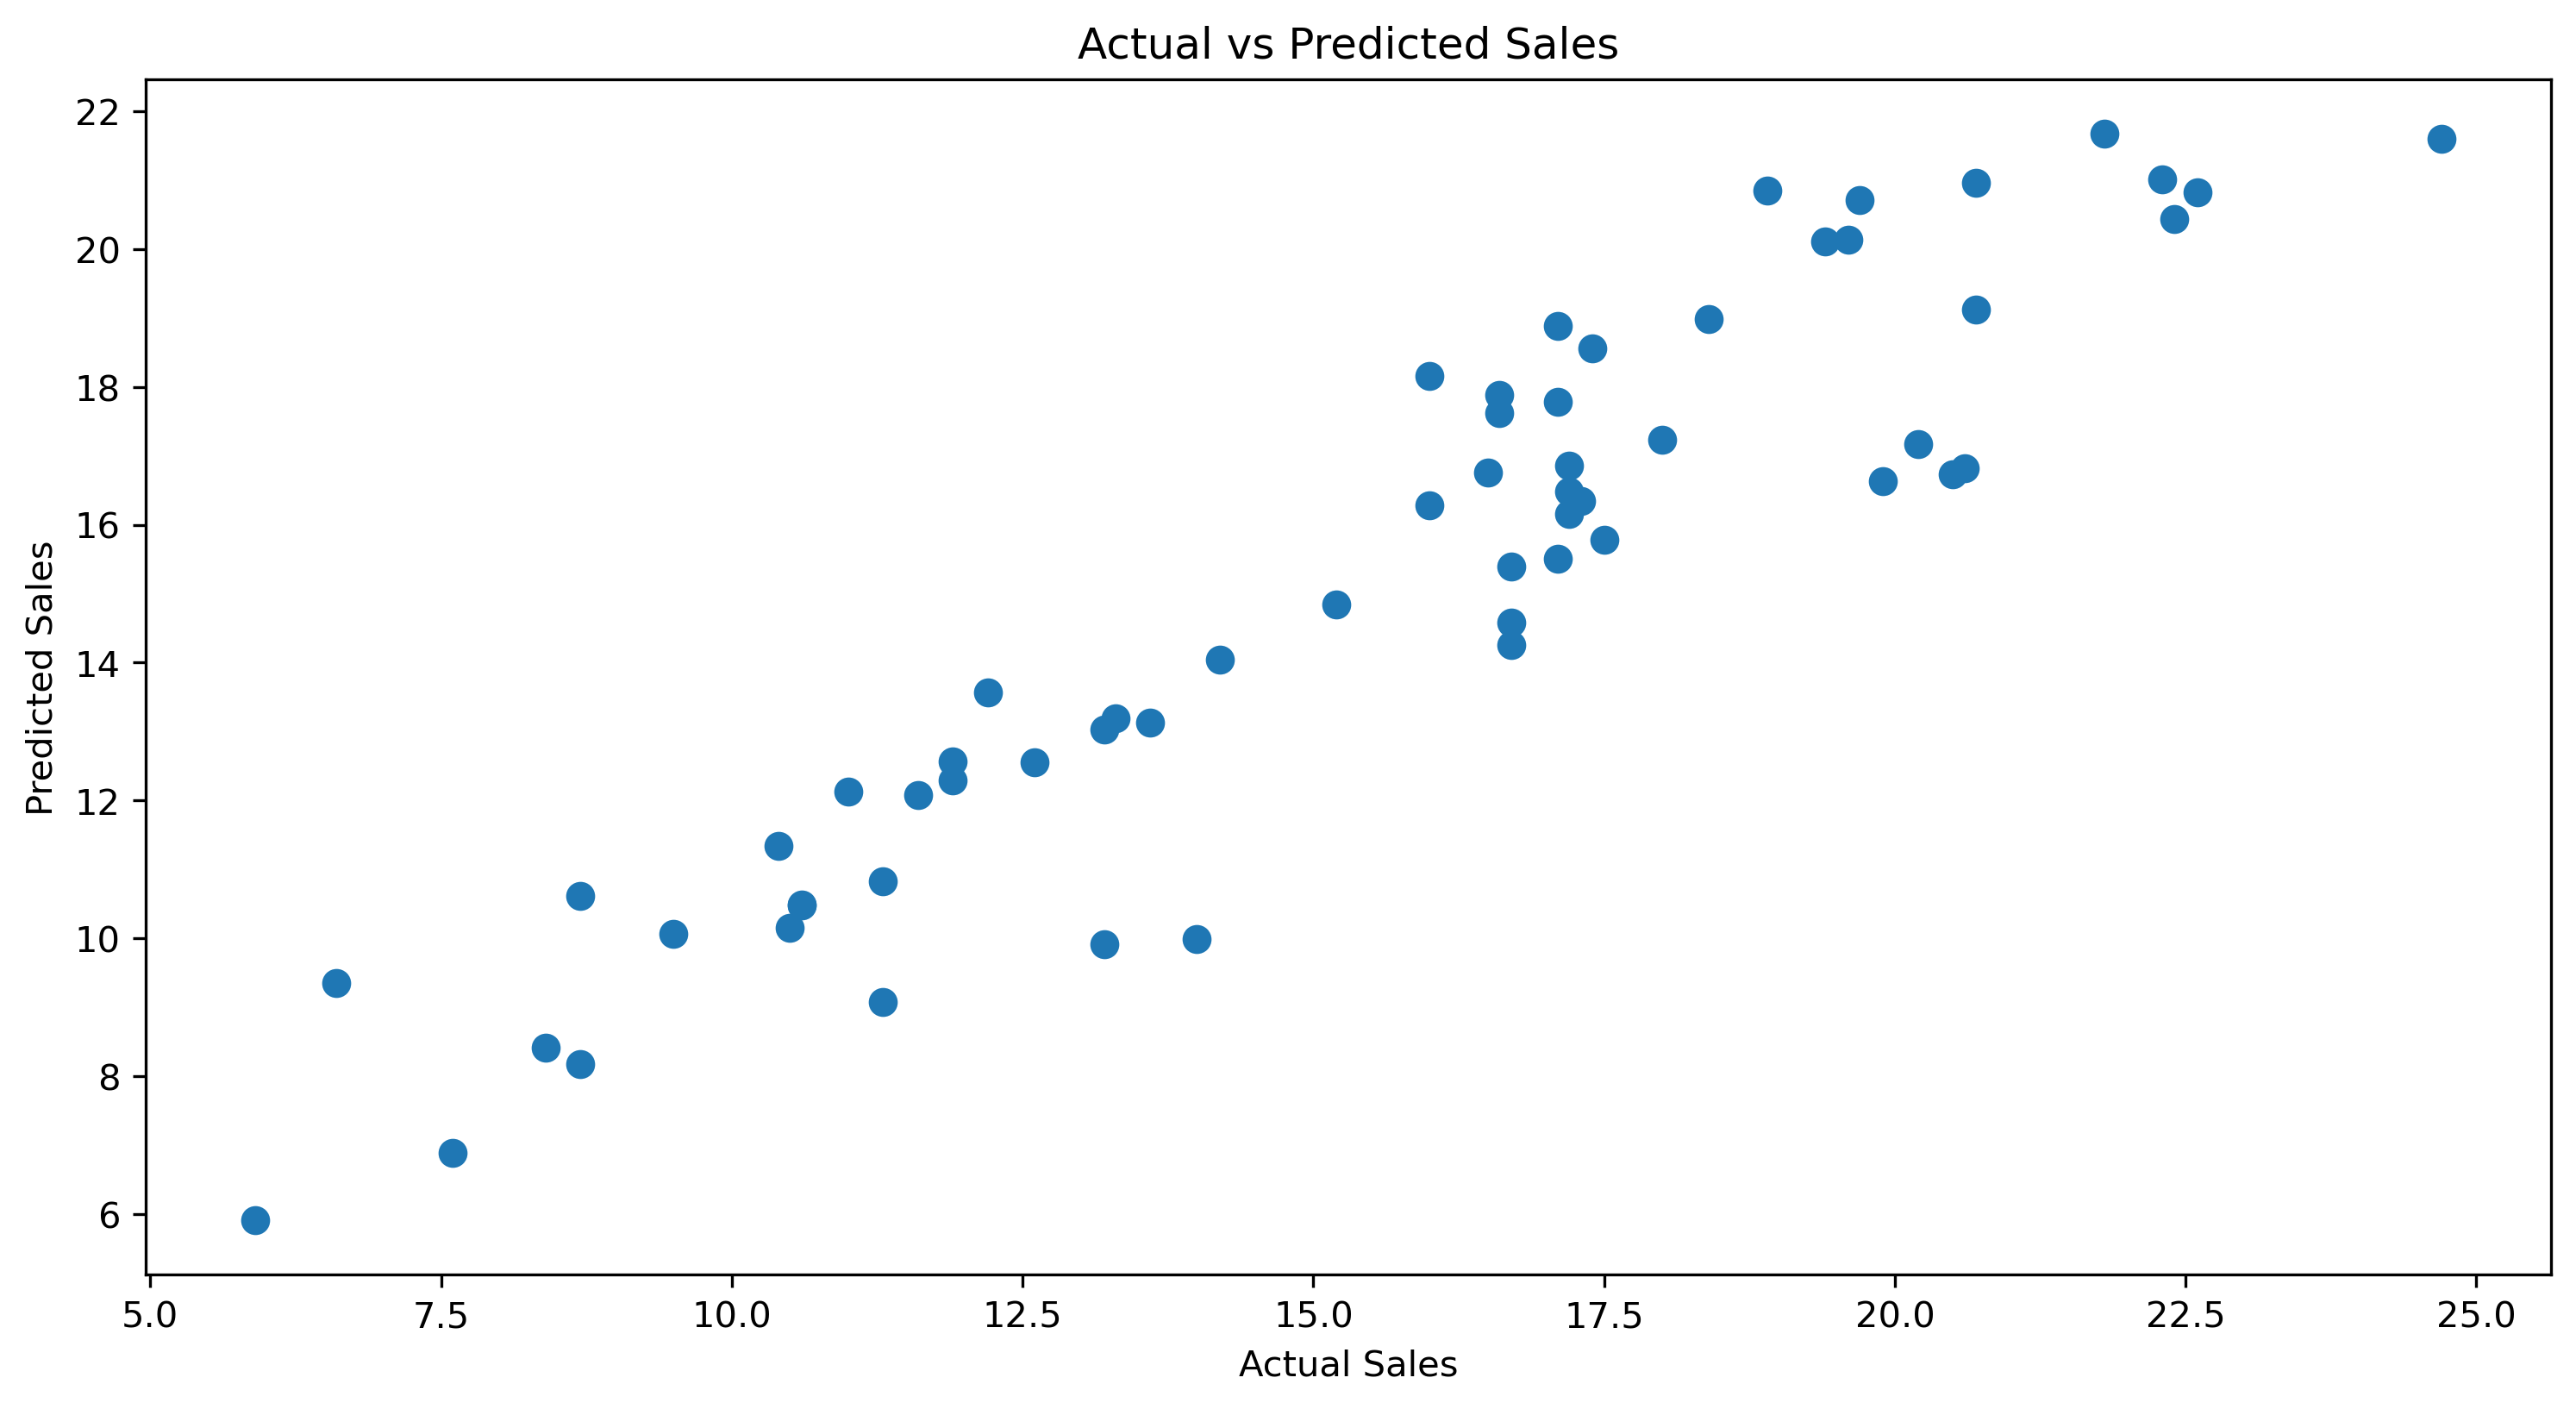

In [257]:
# visualize the results
# TODO: Use scatter plot ot visualize the test and predicted values
plt.figure(figsize=(12, 6), dpi=300)
plt.scatter(y_test, y_pred_mlr, s=50)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

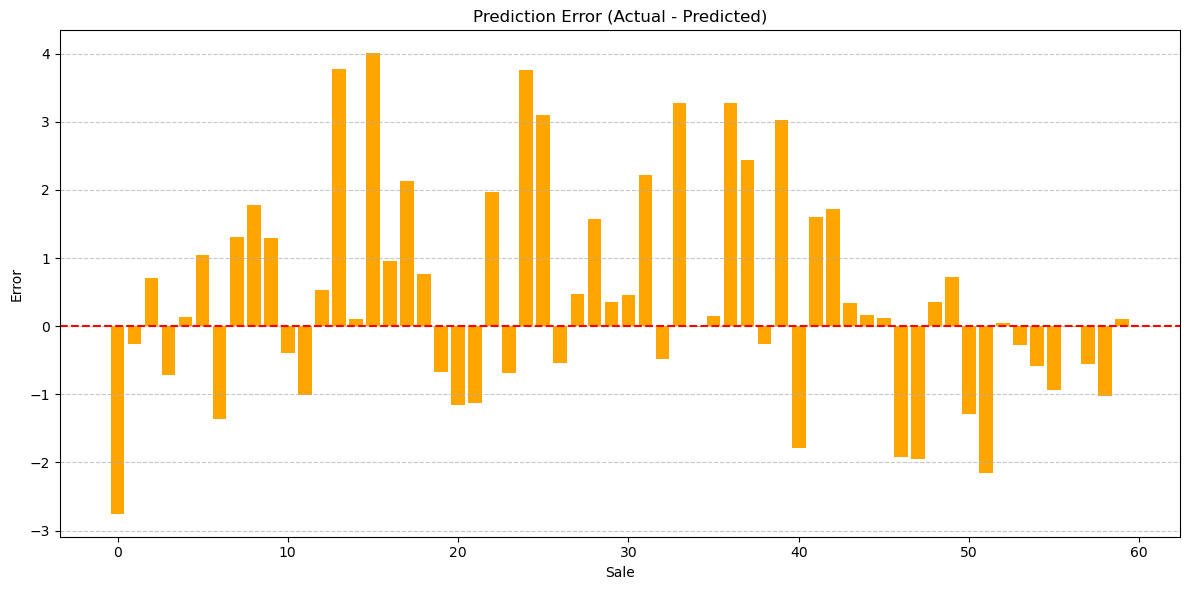

In [258]:
# TODO: visualize the differences using bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(errors)), errors, color='orange')
plt.title('Prediction Error (Actual - Predicted)')
plt.xlabel('Sale')
plt.ylabel('Error')
plt.axhline(0, color='red', linestyle='--')  # Reference line at 0 error
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Evaluating the Model

### R Squared: 
R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 90.11, which indicates that 90.11% of the data fit the regression model.

### Mean Absolute Error: 
Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance. A mean absolute error of 0 means that your model is a perfect predictor of the outputs. The mean absolute error obtained for this particular model is 1.227, which is quite good as it is close to 0.

The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or -norm loss.

$$MAE(y,\hat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n-1} \lvert y_i-\hat{y} \rvert$$

### Mean Square Error: 
Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 2.636, which is quite good.

$$MSE(y,\hat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n-1} (y_i-\hat{y})^2$$

### Root Mean Square Error: 
Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 1.623, which is quite good.

$$Root Mean Square Error (RMSE) = \sqrt{MSE(y,\hat{y})}$$

In [260]:
# Model Evaluation
# TODO: Calculate and print the indicated metrics (use sklearn.metrics package)
from sklearn import metrics

meanAbsErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqrtErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqrtErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('R squared: {:.2f}'.format(mlr.score(X_train, y_train)*100))
print('R squared test: {:.2f}'.format(mlr.score(X_test, y_test)*100))
print('Mean Absolute Error:', meanAbsErr)
print('Mean Square Error:', meanSqrtErr)
print('Root Mean Square Error:', rootMeanSqrtErr)

R squared: 91.05
R squared test: 86.56
Mean Absolute Error: 1.2278183566589411
Mean Square Error: 2.6360765623280664
Root Mean Square Error: 1.6235998775338911
